In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.eager as tfe
%load_ext autoreload
%autoreload 2

/Users/alanluu2/Programs/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd ..

/Users/alanluu2/Research/MCMC


In [3]:
tfe.enable_eager_execution()

In [4]:
from utils.distributions import Gaussian
from utils.ensembles import CanonicalEnsemble
from utils.initializers import ConstantInitializer
from utils.kernels import GaussianKernel
from utils.profilers import Profiler
from utils.systems import System
from utils.walkers import SingleWalker

In [5]:
sigma = tf.constant([[1, 0], [0, 1]], dtype='float32')

In [6]:
mu = tf.constant([[0,0]], dtype='float32')

In [9]:
init = tf.constant([[4,4]], dtype='float32')

In [41]:
gaussian = Gaussian(mu, sigma)

In [8]:
ensemble = CanonicalEnsemble()

In [10]:
initializer = ConstantInitializer(x=init)

In [62]:
kernel = GaussianKernel(sigma)

In [12]:
profiler = Profiler()

In [13]:
walker = SingleWalker()

In [63]:
system = System(distribution=gaussian,
                ensemble=ensemble,
                initializer=initializer,
                kernel=kernel,
                profiler=profiler,
                walker=walker)

In [59]:
system.initialize_walker()

In [31]:
system.distribution.mu.numpy()[0]

array([0., 0.], dtype=float32)

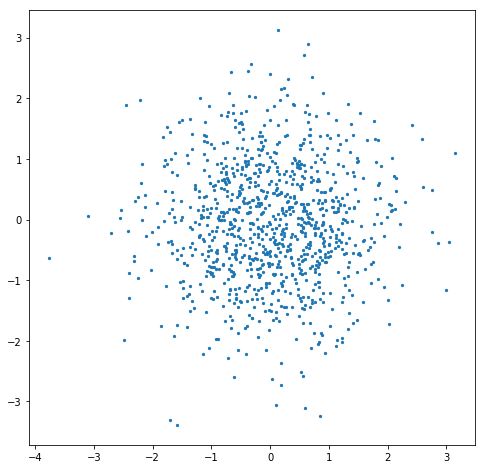

In [60]:
system.viz_dist()

In [47]:
system.distribution.get_density?

Signature: system.distribution.get_density(x)
Docstring: <no docstring>
File:      ~/Research/MCMC/utils/distributions.py
Type:      method


In [54]:
tf64 = system.kernel.propose(system.walker.x, gaussian)

In [56]:
tf.cast(tf64, tf.float32)

<tf.Tensor: id=94, shape=(1, 2), dtype=float32, numpy=array([[3.3843658, 2.8822   ]], dtype=float32)>

In [55]:
tf64

<tf.Tensor: id=92, shape=(1, 2), dtype=float64, numpy=array([[3.38436575, 2.88220011]])>

In [52]:
system.walker.x

<tf.Tensor: id=5, shape=(1, 2), dtype=float32, numpy=array([[4., 4.]], dtype=float32)>

In [77]:
system.evolve(30)

In [74]:
system.profiler.history

{'run1': <tf.Tensor: id=5, shape=(1, 2), dtype=float32, numpy=array([[4., 4.]], dtype=float32)>,
 'run2': <tf.Tensor: id=5, shape=(1, 2), dtype=float32, numpy=array([[4., 4.]], dtype=float32)>,
 'run3': <tf.Tensor: id=5, shape=(1, 2), dtype=float32, numpy=array([[4., 4.]], dtype=float32)>,
 'run4': <tf.Tensor: id=2736, shape=(66, 2), dtype=float32, numpy=
 array([[ 4.        ,  4.        ],
        [ 4.        ,  4.        ],
        [ 2.7225006 ,  4.636144  ],
        [ 3.3886356 ,  3.5904374 ],
        [ 3.3886356 ,  3.5904374 ],
        [ 4.5099998 ,  2.9810357 ],
        [ 3.404853  ,  2.9981575 ],
        [ 3.404853  ,  2.9981575 ],
        [ 2.6116357 ,  3.8117135 ],
        [ 1.586212  ,  2.994295  ],
        [ 1.586212  ,  2.994295  ],
        [ 2.1252067 ,  1.5357625 ],
        [ 2.1252067 ,  1.5357625 ],
        [ 2.1252067 ,  1.5357625 ],
        [-1.3331709 ,  2.3291514 ],
        [-1.6282284 ,  1.154074  ],
        [-1.6282284 ,  1.154074  ],
        [-1.6282284 ,  1.15407

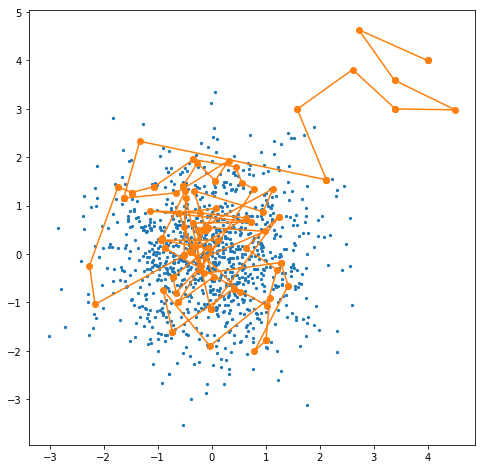

In [80]:
system.viz_trajectory()

In [40]:
sigma.numpy()[:,0]

array([1., 0.], dtype=float32)

In [24]:
en = g.get_energy_fn()

In [39]:
x = tf.constant([[0,0]], dtype='float32')

In [53]:
en(x)

<tf.Tensor: id=94, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [ ]:
tf.diag_part(0.5 * tf.matmul(tf.matmul(x - mu, i_sigma), tf.transpose(x - mu)))

In [18]:
i_sigma = np.linalg.inv(np.copy(sigma))

In [21]:
sigma

<tf.Tensor: id=11, shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [32]:
mu = 

<tf.Tensor: id=22, shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [43]:
mu.get_shape()

TensorShape([Dimension(1), Dimension(2)])

In [54]:
a = tf.tf.matmul(x - mu, sigma)

In [57]:
 exp = tf.diag_part(0.5 * tf.matmul(tf.matmul(x - mu, i_sigma),
                                        tf.transpose(x - mu)))

In [58]:
exp

<tf.Tensor: id=127, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [49]:
t = tf.transpose(x - mu)

In [46]:
x = tf.constant([[1,0]], dtype='float32')

In [50]:
tf.matmul(t, sigma)

InvalidArgumentError: Matrix size-incompatible: In[0]: [2,1], In[1]: [2,2] [Op:MatMul] name: MatMul/

In [63]:
tf.math.exp(x=-exp)

<tf.Tensor: id=132, shape=(1,), dtype=float32, numpy=array([0.60653067], dtype=float32)>

In [71]:
exp

<tf.Tensor: id=127, shape=(1,), dtype=float32, numpy=array([0.5], dtype=float32)>

In [62]:
math.exp(0.5)

1.6487212707001282

In [72]:
from utils.walkers import SingleWalker

In [74]:
w = SingleWalker()

In [75]:
from utils.initializers import ConstantInitializer

In [76]:
init = ConstantInitializer(tf.constant([[0,0]]))

In [77]:
init

In [79]:
init.initialize(w)

In [80]:
w.x

<tf.Tensor: id=144, shape=(1, 2), dtype=int32, numpy=array([[0, 0]], dtype=int32)>

In [ ]:
np.random.multivariate_normal(mean=x,
                                             cov=self.sigma,
                                             size=1)[0]

In [85]:
x = w.x.numpy()
sigma_cov = sigma.numpy()

In [90]:
np.random.multivariate_normal(mean=x[0],
                                             cov=sigma_cov,
                                             size=1)[0]

array([-2.10643794,  1.94987535])

x

In [88]:
x

array([[0, 0]], dtype=int32)

In [91]:
import tensorflow_probability as tfp
tfd = tfp.distributions

ModuleNotFoundError: No module named 'tensorflow_probability'

In [92]:
n = np.array([0,0])

In [93]:
n

array([0, 0])

In [99]:
tf_n = tf.constant([n])

In [100]:
tf_n

<tf.Tensor: id=158, shape=(1, 2), dtype=int32, numpy=array([[0, 0]], dtype=int32)>

In [98]:
tf_n

<tf.Tensor: id=155, shape=(2,), dtype=int64, numpy=array([0, 0])>

In [107]:
a = tf.constant(2)

In [108]:
b = tf.constant(3)

In [109]:
tf.multiply(a, b)

<tf.Tensor: id=169, shape=(), dtype=int32, numpy=6>

In [113]:
a = g.get_density(tf.constant([[1,2]], dtype='float32'))

In [114]:
b = g.get_density(tf.constant([[2,2]], dtype='float32'))

In [115]:
tf.divide(a,b)

<tf.Tensor: id=221, shape=(1,), dtype=float32, numpy=array([4.481689], dtype=float32)>

In [116]:
a

<tf.Tensor: id=204, shape=(1,), dtype=float32, numpy=array([0.082085], dtype=float32)>

In [117]:
b

<tf.Tensor: id=220, shape=(1,), dtype=float32, numpy=array([0.01831564], dtype=float32)>

In [125]:
tf_2 = tf.constant([2], dtype='float32')

In [120]:
tf.multiply(tf_1, b)

<tf.Tensor: id=226, shape=(1,), dtype=float32, numpy=array([0.01831564], dtype=float32)>

In [128]:
tf.minimum(1, tf_2).numpy()[0]

1.0

In [129]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])

In [131]:
a = w.x

In [135]:
a = tf.constant([[1,1]], dtype='float32')

In [133]:
b = tf.constant([[2,2]], dtype='float32')

In [140]:
tf.concat([a,b], axis=0)

<tf.Tensor: id=262, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [2., 2.]], dtype=float32)>